<a href="https://colab.research.google.com/github/mumumu99/EEE3314_Segmentation_Challenge/blob/main/Converting_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow-io

     |████████████████████████████████| 22.7 MB 71.1 MB/s 


In [3]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

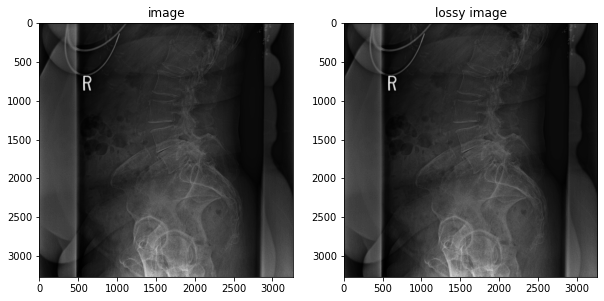

In [4]:
import tensorflow_io as tfio

image_bytes = tf.io.read_file('/content/drive/MyDrive/challenge/train/img/001.dcm')

image = tfio.image.decode_dicom_image(image_bytes, dtype=tf.uint16)

skipped = tfio.image.decode_dicom_image(image_bytes, on_error='skip', dtype=tf.uint8)

lossy_image = tfio.image.decode_dicom_image(image_bytes, scale='auto', on_error='lossy', dtype=tf.uint8)


fig, axes = plt.subplots(1,2, figsize=(10,10))
axes[0].imshow(np.squeeze(image.numpy()), cmap='gray')
axes[0].set_title('image')
axes[1].imshow(np.squeeze(lossy_image.numpy()), cmap='gray')
axes[1].set_title('lossy image');

In [5]:
from scipy.io import loadmat

In [6]:
mat = loadmat('/content/drive/MyDrive/challenge/train/label/001.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'label_separated'])

In [7]:
x = mat['label_separated']
x.shape

(3268, 3268, 7)

Text(0.5, 1.0, '7')

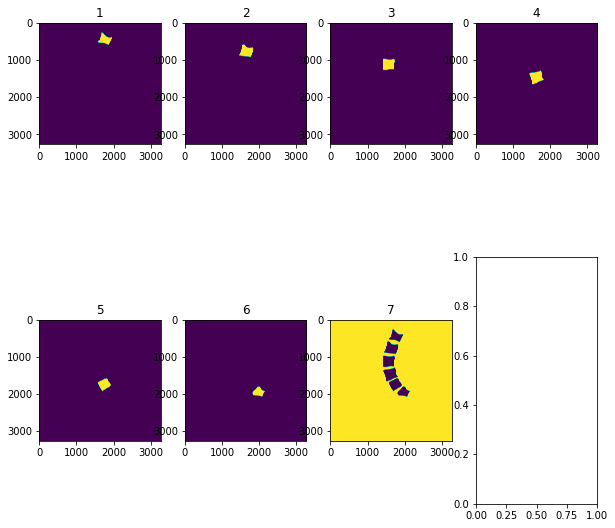

In [8]:
fig, axes = plt.subplots(2,4, figsize=(10,10))
axes[0,0].imshow(x[:,:,0])
axes[0,0].set_title('1')
axes[0,1].imshow(x[:,:,1])
axes[0,1].set_title('2')
axes[0,2].imshow(x[:,:,2])
axes[0,2].set_title('3')
axes[0,3].imshow(x[:,:,3])
axes[0,3].set_title('4')
axes[1,0].imshow(x[:,:,4])
axes[1,0].set_title('5')
axes[1,1].imshow(x[:,:,5])
axes[1,1].set_title('6')
axes[1,2].imshow(x[:,:,6])
axes[1,2].set_title('7')

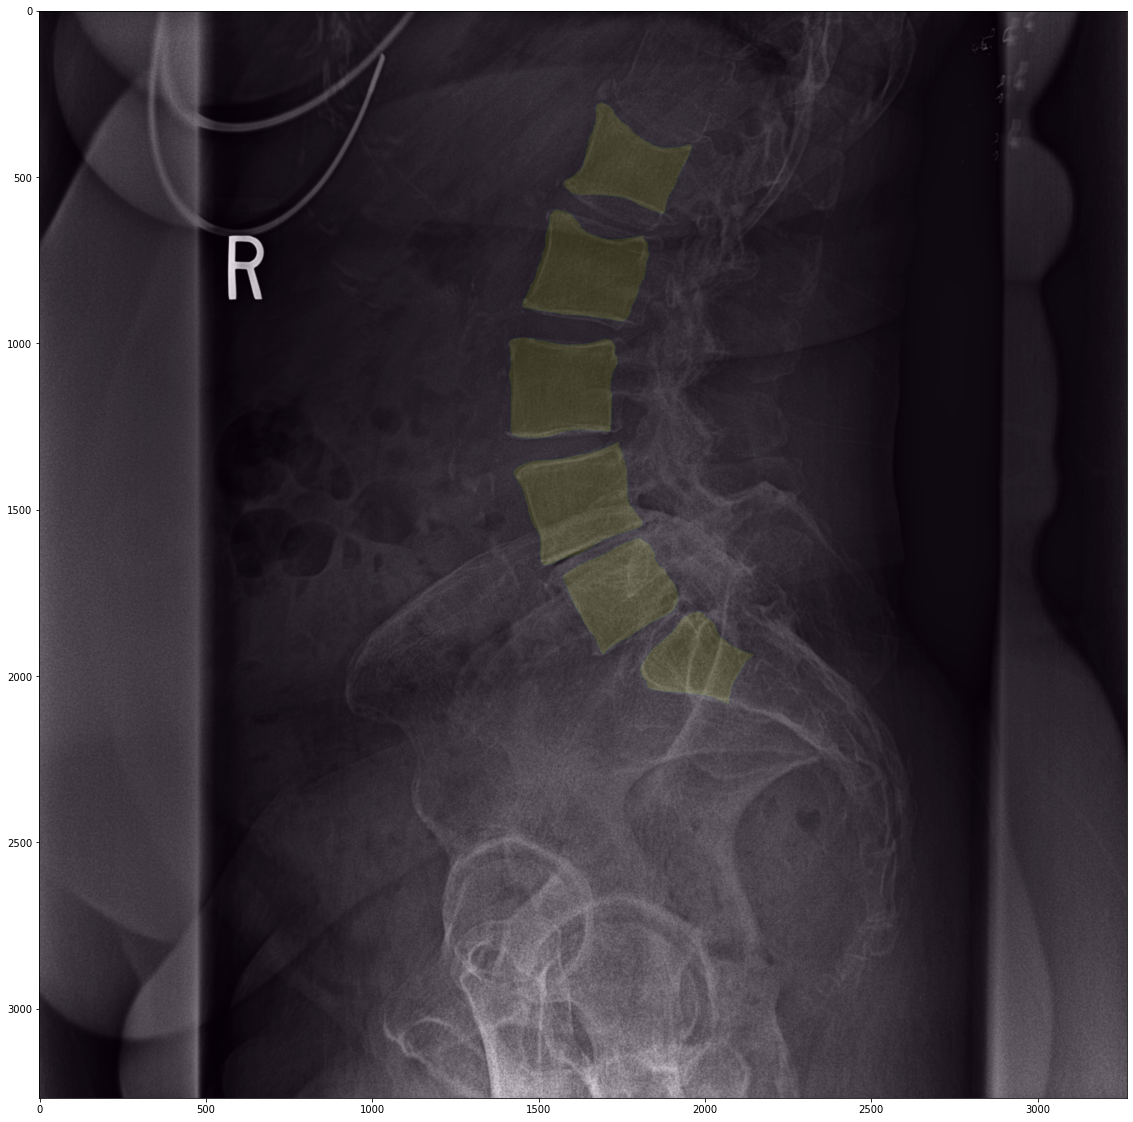

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(np.squeeze(image.numpy()), cmap='gray')
plt.imshow(x[:,:,0]+x[:,:,1]+x[:,:,2]+x[:,:,3]+x[:,:,4]+x[:,:,5], alpha=0.1)

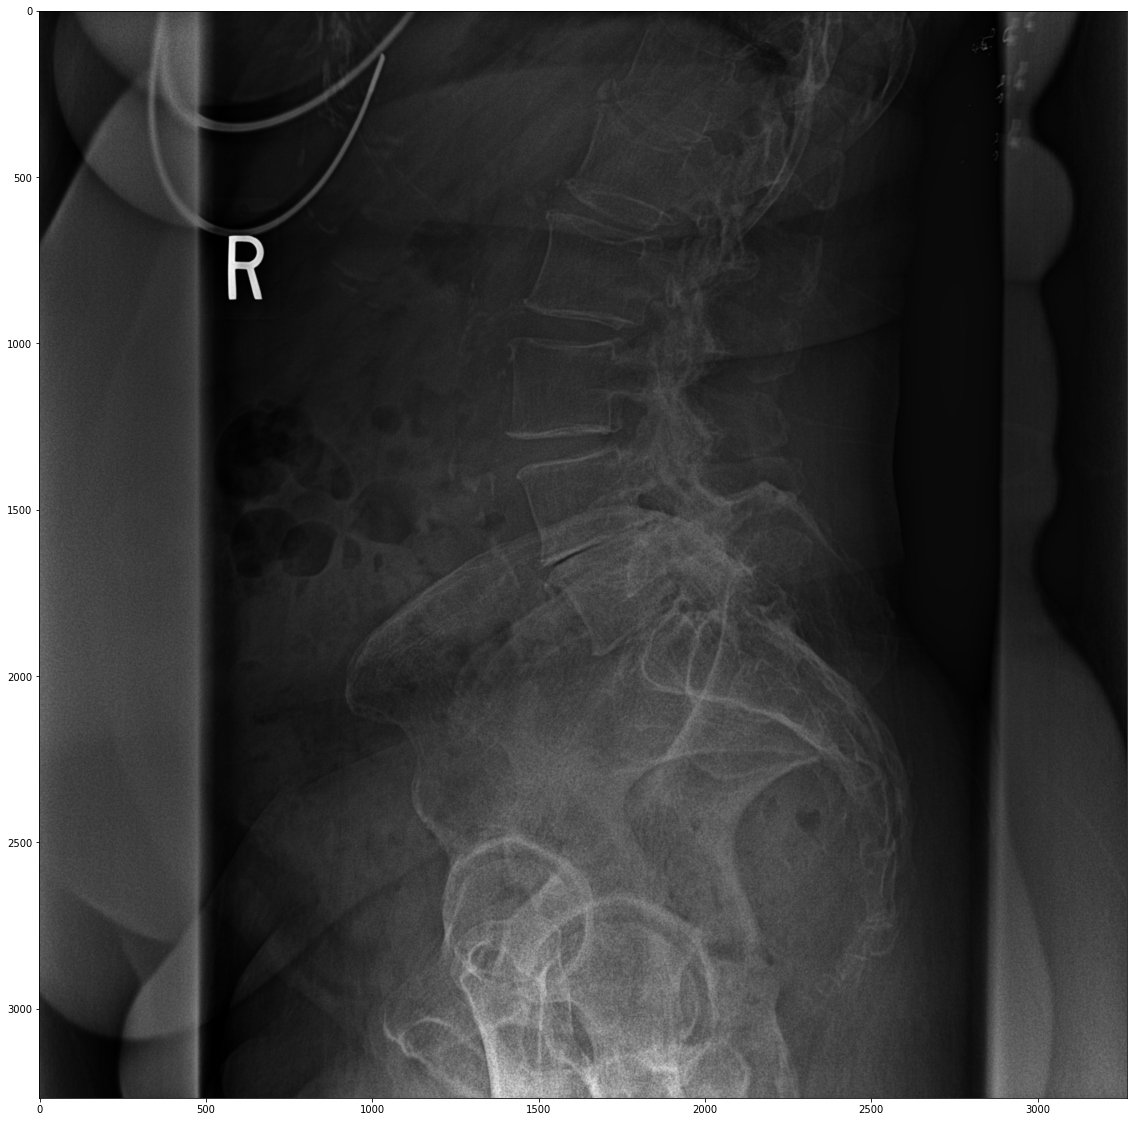

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(np.squeeze(image.numpy()), cmap='gray')

In [14]:
from glob import glob
import cv2

In [ ]:
dcm_images = glob('/content/drive/MyDrive/challenge/train/img/*.dcm')
dcm_images.sort()
dcm_images

for i in range(len(dcm_images)):
    image_bytes = tf.io.read_file(dcm_images[i])
    image = tfio.image.decode_dicom_image(image_bytes, dtype=tf.uint16).numpy()
    plt.imsave('/content/drive/MyDrive/challenge/jpg/train/images/%03d.jpg'%(i), image, cmap='gray')
    

In [92]:
def resize_with_padding(image, desired_size):
    old_size = image.shape[:2] # old_size is in (height, width) format

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    image = cv2.resize(image, (new_size[1], new_size[0]))

    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    color = [0, 0, 0]
    color2 = [1, 1, 1]
    new_image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
    new_image[:,:,6] = cv2.copyMakeBorder(image[:,:,6], top, bottom, left, right, cv2.BORDER_CONSTANT, value=color2)
    return new_image

In [93]:
mat_masks = glob('/content/drive/MyDrive/challenge/train/label/*.mat')
mat_masks.sort()
mat_masks

for i in range(len(mat_masks)):
    mat = loadmat(mat_masks[i])
    x = mat['label_separated']
    x = resize_with_padding(x, 256)
    if i < 100:
        plt.imsave('/content/drive/MyDrive/21-2학기/기초인공지능/UNet Hands-on/data/train_masks/%03d_L1.jpg'%(i), x[:,:,0], cmap='gray')
        plt.imsave('/content/drive/MyDrive/21-2학기/기초인공지능/UNet Hands-on/data/train_masks/%03d_L2.jpg'%(i), x[:,:,1], cmap='gray')
        plt.imsave('/content/drive/MyDrive/21-2학기/기초인공지능/UNet Hands-on/data/train_masks/%03d_L3.jpg'%(i), x[:,:,2], cmap='gray')
        plt.imsave('/content/drive/MyDrive/21-2학기/기초인공지능/UNet Hands-on/data/train_masks/%03d_L4.jpg'%(i), x[:,:,3], cmap='gray')
        plt.imsave('/content/drive/MyDrive/21-2학기/기초인공지능/UNet Hands-on/data/train_masks/%03d_L5.jpg'%(i), x[:,:,4], cmap='gray')
        plt.imsave('/content/drive/MyDrive/21-2학기/기초인공지능/UNet Hands-on/data/train_masks/%03d_S1.jpg'%(i), x[:,:,5], cmap='gray')
        plt.imsave('/content/drive/MyDrive/21-2학기/기초인공지능/UNet Hands-on/data/train_masks/%03d_bg.jpg'%(i), x[:,:,6], cmap='gray')
    else:
        plt.imsave('/content/drive/MyDrive/21-2학기/기초인공지능/UNet Hands-on/data/val_masks/%03d_L1.jpg'%(i), x[:,:,0], cmap='gray')
        plt.imsave('/content/drive/MyDrive/21-2학기/기초인공지능/UNet Hands-on/data/val_masks/%03d_L2.jpg'%(i), x[:,:,1], cmap='gray')
        plt.imsave('/content/drive/MyDrive/21-2학기/기초인공지능/UNet Hands-on/data/val_masks/%03d_L3.jpg'%(i), x[:,:,2], cmap='gray')
        plt.imsave('/content/drive/MyDrive/21-2학기/기초인공지능/UNet Hands-on/data/val_masks/%03d_L4.jpg'%(i), x[:,:,3], cmap='gray')
        plt.imsave('/content/drive/MyDrive/21-2학기/기초인공지능/UNet Hands-on/data/val_masks/%03d_L5.jpg'%(i), x[:,:,4], cmap='gray')
        plt.imsave('/content/drive/MyDrive/21-2학기/기초인공지능/UNet Hands-on/data/val_masks/%03d_S1.jpg'%(i), x[:,:,5], cmap='gray')
        plt.imsave('/content/drive/MyDrive/21-2학기/기초인공지능/UNet Hands-on/data/val_masks/%03d_bg.jpg'%(i), x[:,:,6], cmap='gray')